In [57]:
import requests
australian_data = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/australian_scale")

In [58]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
x,y = load_svmlight_file(f=BytesIO(australian_data.content),n_features=14)

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train=x_train.toarray()
x_test=x_test.toarray()

In [60]:
import numpy as np
m, n = x_train.shape

def svm(x_train,y_train,W):
    g = np.ones([n,1])
    for i in range(m):
        x = x_train[i].reshape(1,n)
        y = y_train[i].reshape(1,1)
        h = 1-np.multiply(y,np.dot(x,W))
        if(h >= 0):
            g += W-np.dot(x.T,y)
        else:
            g += W
    
    W = W - lr * g / m
    return W

In [61]:
def svm_loss(x_train,y_train,f,W):
    m, n = x_train.shape
    loss = 0
    for i in range(m):
        x =x_train[i]
        y =y_train[i]
        h = 1-np.multiply(y,np.dot(W.T,x))
        if(h >= 0):
            loss += f*h
    return loss/m+np.dot(W.T,W)/2


In [62]:
f = 0.9 #factor initialization
lr = 0.01 #learning rate initialization
train_loss = [] #train loss array initialization
test_loss = [] #validation loss array initialization
total_iteration = 100 #total no of iteration

m, no_of_features = x_train.shape
W = np.ones((n,1))
for i in range(total_iteration):
    
    W=svm(x_train,y_train,W)
    loss=svm_loss(x_train,y_train,f,W)
    train_loss.append(loss[0][0])
    
    loss=svm_loss(x_test,y_test,f,W)
    test_loss.append(loss[0][0])


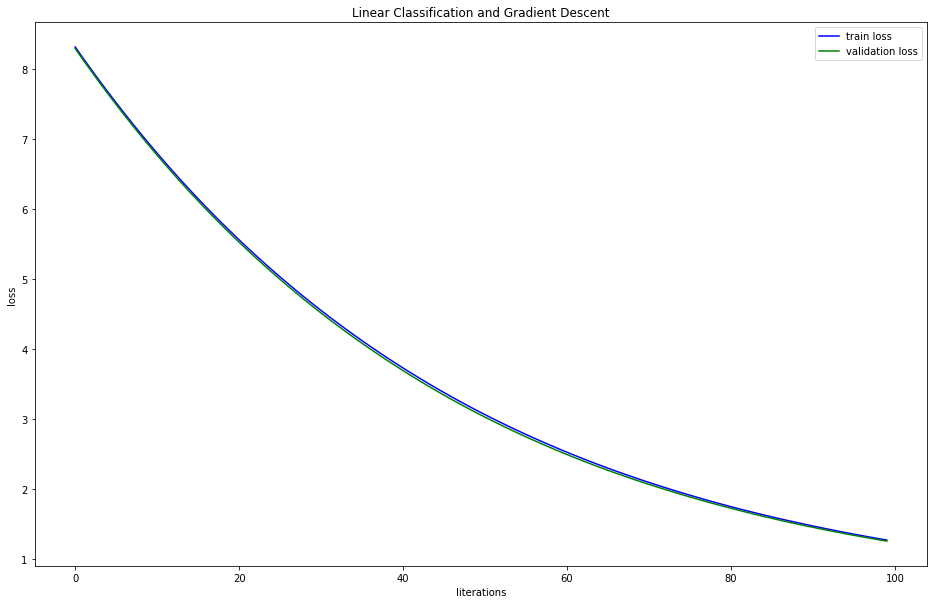

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.plot(train_loss,color="blue",label="train loss")
plt.plot(validation_loss,color="green",label="validation loss")
plt.title("Linear Classification and Gradient Descent")
plt.legend()
plt.xlabel("literations")
plt.ylabel("loss")
plt.show()